In [102]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, ma|tplotlib >= 2.0
"""

import sys
import os
import numpy   as np

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct

from scipy.integrate import solve_ivp

In [103]:
##########################################################################################
### Input Data

OutputDir          = WORKSPACE_PATH + '/ROMNet/Data_100DReact/'
FigDir             = OutputDir + '/fig/'

MixtureFile        = 'gri30.yaml'
NTs                = 10
T0Vec              = np.logspace(np.log10(300), np.log10(3000), NTs) # [2.e-5]
NPerT0             = 2000
tMinVec            = [5.e-3, 5.e-7]

tStratch           = 1.
Nt                 = NPerT0*2

P0Inlet            = ct.one_atm
EqRatioInlet       = 1.
##########################################################################################

In [104]:
def IdealGasConstPressureReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TPY = y[0], P_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_enthalpies) / gas_.cp / gas_.density
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / gas_.density
    
    return ydot


def IdealGasReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TDY = y[0], density_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_int_energies) / gas_.cv / density_
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / density_
    
    return ydot

In [37]:
gas = ct.Solution('gri30.yaml')
gas.TPX = 1001.0, ct.one_atm, 'H2:2,O2:1,N2:4'

In [38]:
#T0      = 1400
#gas.TPX = T0, 10.*ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
r       = ct.IdealGasConstPressureReactor(gas)
sim     = ct.ReactorNet([r])

gas_    = gas
mass_   = r.mass
density_= r.density
P_      = gas_.P
print(gas_.P)

y0      = np.array(np.hstack((gas_.T, gas_.Y[0:-1])), dtype=np.float64)

101325.00000000001


In [59]:
tMin     = 1.e-5#(tMinVec[1]-tMinVec[0])*(T0-900.)/(1700.-900.) + tMinVec[0]
tMax     = 1.e-3
dt0      = 1.e-5
tStratch = 1.0
tVec     = [0.0]
t        = tMin
dt       = dt0
while (t <= tMax):
    tVec.append(t)
    t  =   t + dt
    dt = dt0 * tStratch
rtol       = 1.e-10
SOLVER     = 'BDF'#'RK23'#'BDF'#'Radau'

In [60]:
states     = ct.SolutionArray(gas, 1, extra={'t': [0.0]})
output     = solve_ivp( IdealGasConstPressureReactor_SciPY, (tVec[0],tVec[-1]), y0, method=SOLVER, t_eval=tVec, rtol=rtol )

0.0
45.22828064976791
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.28473182940982e-07
5.28473182940982e-07
1.056946365881964e-06
1.056946365881964e-06
6.341678195291785e-06
6.341678195291785e-06
1.1626410024701605e-05
1.1626410024701605e-05
3.5241016188051405e-05
3.5241016188051405e-05
5.8855622351401206e-05
5.8855622351401206e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.088447164461348e-05
5.08844716

0.00022501505412123046
0.00022501505412123046
0.00022501505412123046
0.00022813495497872049
0.00022813495497872049
0.00022813495497872049
0.00022726854028874138
0.00022726854028874138
0.00022726854028874138
0.0002295220264562523
0.0002295220264562523
0.0002295220264562523
0.00023177551262376322
0.00023177551262376322
0.00023177551262376322
0.00023177551262376322
0.00023402899879127414
0.00023402899879127414
0.00023402899879127414
0.00023402899879127414
0.00023628248495878506
0.00023628248495878506
0.00023628248495878506
0.00023628248495878506
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.00023853597112629598
0.000238535971

0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002568744317980527
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.0002588426711216646
0.00025884

0.0002598880787404893
0.00025988365494505477
0.00025988365494505477
0.0002598880787404893
0.0002598880787404893
0.0002598925025359238
0.0002598925025359238
0.0002598969263313583
0.0002598969263313583
0.0002599411642857035
0.0002599411642857035
0.0002599854022400487
0.0002599854022400487
0.00026002964019439386
0.00026002964019439386
0.0002602755005055102
0.0002602755005055102
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0.00026052136081662657
0

0.0002622334477082537
0.0002622334477082537
0.0002622334477082537
0.0002622334477082537
0.0002621203614718479
0.0002621203614718479
0.0002621203614718479
0.000262063818353645
0.000262063818353645
0.000262063818353645
0.00026203554679454354
0.00026203554679454354
0.00026203554679454354
0.0002620214110149928
0.0002620214110149928
0.0002620214110149928
0.0002620214110149928
0.00026203554679454354
0.00026203554679454354
0.00026203554679454354
0.00026203554679454354
0.0002620496825740943
0.0002620496825740943
0.0002620496825740943
0.00026206381835364504
0.00026206381835364504
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.0002622051761491525
0.00

0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002700529903317731
0.0002698901789146512
0.0002698901789146512
0.0002698901789146512
0.00026980877320609026
0.00026980877320609026
0.00026980877320609026
0.0002697680703518098
0.0002697680703518098
0.00026974771892466956
0.00026974771892466956
0.00026973754321109946
0.00026973754321109946
0.00026973245535431443
0.00026973245535431443
0.00026973245535431443
0.0002697375432110995
0.0002697375432110995
0.0002697375432110995
0.0002697375432110995
0.0002697426310678846
0.0002697426310678846
0.00026974771892466966
0.00026974771892466966
0.00026974771892466966
0.00026975280678145474
0.0002697528067814

0.00027176189879984925
0.00027176189879984925
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.0002717733591543598
0.000271

0.000275960886110527
0.000275960886110527
0.000275960886110527
0.0002759059314073574
0.0002759059314073574
0.0002759059314073574
0.0002758784540557726
0.0002758784540557726
0.0002758784540557726
0.0002758647153799802
0.0002758647153799802
0.0002758647153799802
0.00027587845405577265
0.00027587845405577265
0.00027587845405577265
0.00027587845405577265
0.0002758921927315651
0.0002758921927315651
0.00027590593140735755
0.00027590593140735755
0.00027590593140735755
0.00027591967008315
0.00027591967008315
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.0002760265367355974
0.00027602

0.0002767084665858048
0.00027677010835364503
0.00027677010835364503
0.0002769418932529831
0.0002769418932529831
0.00027711367815232114
0.00027711367815232114
0.0002772854630516592
0.0002772854630516592
0.00027745724795099724
0.00027745724795099724
0.0002778361614670368
0.0002778361614670368
0.00027821507498307634
0.00027821507498307634
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.0002785939884991159
0.

0.0002795807187205568
0.0002795807187205568
0.0002795346241279335
0.0002795346241279335
0.00027951157683162183
0.00027951157683162183
0.000279500053183466
0.000279500053183466
0.0002794942913593881
0.0002794942913593881
0.000279500053183466
0.000279500053183466
0.0002795058150075439
0.0002795058150075439
0.00027951157683162183
0.00027951157683162183
0.00027956919507240096
0.00027956919507240096
0.0002796268133131801
0.0002796268133131801
0.0002796844315539592
0.0002796844315539592
0.00027983830310346656
0.00027983830310346656
0.0002799921746529739
0.0002799921746529739
0.00028014604620248124
0.00028014604620248124
0.0002802999177519886
0.0002802999177519886
0.0002806398967743266
0.0002806398967743266
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.0002809798757966647
0.00

0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.00028321609849273137
0.000283216

0.00028421377456428506
0.00028421377456428506
0.00028421377456428506
0.0002841748344428735
0.0002841748344428735
0.0002841748344428735
0.00028415536438216774
0.00028415536438216774
0.00028415536438216774
0.0002841748344428735
0.0002841748344428735
0.0002841748344428735
0.0002841748344428735
0.0002841943045035793
0.0002841943045035793
0.00028421377456428506
0.00028421377456428506
0.00028421377456428506
0.00028421377456428506
0.00028423324462499084
0.00028423324462499084
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.0002843561256035343
0.000284356125603534

0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002861564088216658
0.0002860389236770429
0.0002860389236770429
0.0002860389236770429
0.00028598018110473144
0.00028598018110473144
0.00028598018110473144
0.00028

0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.0002881622874596408
0.00028801479038016996
0.0002880

0.0002894928775518699
0.0002894928775518699
0.0002894928775518699
0.0002893374947591027
0.0002893374947591027
0.00028949287755186996
0.00028949287755186996
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.0002896482603446372
0.000289

0.00028986965995994276
0.00028986965995994276
0.00028986965995994276
0.00028986595534547595
0.00028986595534547595
0.0002898696599599428
0.0002898696599599428
0.0002898733645744097
0.0002898733645744097
0.00028987706918887654
0.00028987706918887654
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0002899141153335452
0.0

0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029003104222765513
0.00029002742444008984
0.00029002742444008984
0.00029003104222765513
0.00029003104222765513
0.0002900346600152204
0.0002900346600152204
0.0002900382778027857
0.0002900382778027857
0.00029007445567843864
0.00029007445567843864
0.00029007445567843864
0.00029007445567843864
0.00029007445567843864
0.0002900744556

0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902417783533324
0.0002902135143879787
0.0002902135143879787
0.0002902135143879787
0.00029019938240530186
0.00029019938240530186
0.0002901923164139635
0.0002901923164139635
0.000290

0.00029116258923968745
0.0002911803004659041
0.0002911803004659041
0.00029119801169212074
0.00029119801169212074
0.0002912157229183374
0.0002912157229183374
0.0002913928351805038
0.0002913928351805038
0.0002913928351805038
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.00029156994744267026
0.0002915699474426

0.0002922354241291829
0.00029225179022919457
0.00029225179022919457
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.00029241545122931127
0.0002924154

0.00029340886534598074
0.00029340886534598074
0.00029340789897106076
0.00029340789897106076
0.0002934074157836008
0.0002934074157836008
0.00029340789897106076
0.00029340789897106076
0.00029340838215852075
0.00029340838215852075
0.00029340886534598074
0.00029340886534598074
0.0002934136972205806
0.0002934136972205806
0.00029341852909518047
0.00029341852909518047
0.00029342336096978034
0.00029342336096978034
0.000293471679715779
0.000293471679715779
0.0002935199984617777
0.0002935199984617777
0.00029356831720777634
0.00029356831720777634
0.0002936474517479417
0.0002936474517479417
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705
0.00029372658628810705


0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.00029564048794253534
0.000295639481457183
0.000295639481457183
0.00029564048794253534
0.00029564048794253534
0.0002956414944278877
0.0002956414944278877
0.00029564250091324007
0.00029564250091324007
0.00029564350739859244
0.00029564350739859244
0.0002956535722521161
0.0002956535722521161
0.0002956636371056397
0.0002956636371056397
0.00029567370195916336
0.00029567370195916336
0.000295683766812687
0.000295683766812687
0.0002957844153479234
0.0

0.0002962488177656263
0.0002962488177656263
0.0002962567957731642
0.0002962567957731642
0.00029626477378070213
0.00029626477378070213
0.00029627275178824004
0.00029627275178824004
0.00029628072979577796
0.00029628072979577796
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.0002963605098711571
0.00

0.0002969025885817796
0.0002969025885817796
0.00029683816258957343
0.00029683816258957343
0.00029683816258957343
0.0002969025885817796
0.0002969025885817796
0.00029696701457398577
0.00029696701457398577
0.00029703144056619194
0.00029703144056619194
0.0002970958665583981
0.0002970958665583981
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0002973106871171836
0.0

0.00029829956849100923
0.00029829956849100923
0.00029829956849100923
0.00029829956849100923
0.00029829956849100923
0.00029829956849100923
0.00029829956849100923
0.00029829956849100923
0.00029829956849100923
0.0002981993777013492
0.0002981993777013492
0.0002982995684910092
0.0002982995684910092
0.00029839975928066913
0.00029839975928066913
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291
0.0002984999500703291

0.00029911685612466155
0.00029911685612466155
0.00029911685612466155
0.0002990266870471558
0.0002990266870471558
0.0002990266870471558
0.0002989816025084029
0.0002989816025084029
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704715575
0.00029902668704

0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914917258115257
0.00029914745274248547
0.00029914745274248547
0.00029914917258115257
0.00029914917258115257
0.00029915089241981966
0.00029915089241981966
0.00029915261225848676
0.00029915261225848676
0.0002991698106451577
0.0002991698106451577
0.00029918700

0.0002996651036354867
0.0002996651036354867
0.0002996651036354867
0.0002996805182699273
0.0002996805182699273
0.0002996805182699273
0.00029969593290436785
0.00029969593290436785
0.00029969593290436785
0.0002997113475388084
0.0002997113475388084
0.0002997113475388084
0.000299726762173249
0.000299726762173249
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0.00029982203115919983
0

0.0003003902915666138
0.0003003283721190451
0.0003003283721190451
0.0003003902915666138
0.0003003902915666138
0.00030045221101418246
0.00030045221101418246
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046175115
0.00030051413046

0.00030094184883478424
0.000300980092282446
0.000300980092282446
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.00030113527288079295
0.0003011352728

0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.0003014877966082948
0.0003014877966082948
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900915044186
0.00030156900

0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.00030239589457117767
0.000302395

0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.0003027400663287685
0.00030274

0.0003031452377510259
0.0003031452377510259
0.0003031411730476262
0.0003031411730476262
0.0003031452377510259
0.0003031452377510259
0.0003031493024544256
0.0003031493024544256
0.0003031533671578253
0.0003031533671578253
0.00030315743186122503
0.00030315743186122503
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.00030319807889522214
0.0003031980788952221

0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035422405473846
0.0003035334102633392
0.0003035334102633392
0.00030354224054738465
0.00030354224054738465
0.0003035510708314301
0.0003035510708314301
0.0003035510708314301
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.0003035599011154756
0.000303

0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.0003037481629681934
0.00030374

0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030407992589828574
0.00030405057759727734
0.00030405057759727734
0.00030403590344677315
0.00030403590344677315
0.00030403590344677315
0.00030402856637152105
0.00030402856637152105
0.00030403590344677315
0.00030403590344677315
0.00030404324052202525
0.00030404324052202525
0.00030405057759727734
0.00030405057759727734
0.00030405791467252944
0.00030405791467252944
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.0003041312854250504
0.00

0.00030434563802323394
0.00030434563802323394
0.00030434563802323394
0.00030434563802323394
0.00030434563802323394
0.000304318461201245
0.000304318461201245
0.000304318461201245
0.0003043048727902505
0.0003043048727902505
0.000304318461201245
0.000304318461201245
0.0003043320496122395
0.0003043320496122395
0.000304345638023234
0.000304345638023234
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208936435736
0.0003044208

0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.00030470183263948573
0.000304701

0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030508458608749246
0.00030504329903460406
0.00030504329903460406
0.00030502265550815986
0.00030502265550815986
0.00030502265550815986
0.00030504329903460406
0.00030504329903460406
0.00030504329903460406
0.00030506394256104826
0.00030506394256104826
0.000305084

0.000305292961540404
0.000305292961540404
0.0003052815266026197
0.0003052815266026197
0.0003052758091337276
0.0003052758091337276
0.0003052729503992815
0.0003052729503992815
0.00030527580913372756
0.00030527580913372756
0.00030527580913372756
0.0003052786678681736
0.0003052786678681736
0.00030528152660261966
0.00030528152660261966
0.0003052843853370657
0.0003052843853370657
0.00030528724407151176
0.00030528724407151176
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.00030531106953523673
0.

0.00030556600933411845
0.00030556600933411845
0.00030556600933411845
0.0003055566830367228
0.0003055566830367228
0.0003055660093341184
0.0003055660093341184
0.000305575335631514
0.000305575335631514
0.0003055846619289096
0.0003055846619289096
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056610152219711
0.0003056

0.0003059230603036715
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.0003059286895392795
0.00030592

0.00030615260854979635
0.00030615260854979635
0.00030615260854979635
0.00030614194616433775
0.00030614194616433775
0.0003061526085497964
0.0003061526085497964
0.00030616327093525506
0.00030616327093525506
0.0003061739333207137
0.0003061739333207137
0.00030618459570617236
0.00030618459570617236
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.00030626457591098605
0.0003062645759

0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.00030647915202482856
0.000306479

0.0003066220602820066
0.0003066220602820066
0.0003066220602820066
0.00030662614157426994
0.00030662614157426994
0.00030662614157426994
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.00030666029244088736
0.000306660292

0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.0003068327007131511
0.00030683

0.0003069509074594612
0.000306965130752547
0.000306965130752547
0.0003069793540456328
0.0003069793540456328
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.00030705317682999845
0.0003070531768299

0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.0003071404394310863
0.00030714

0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.00030750651929802925
0.0003074638559558013
0.0003074638559558013
0.00030744252428468733
0.00030744252428468733
0.00030744252428468733
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.0003074638559558013
0.000307463855

0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.0003077037434202482
0.00030767255681544243
0.00030767255681544243
0.00030767255681544243
0.00030765696351303955
0.00030765696351303955
0.00030767255681544243
0.00030767255681544243
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0003076881501178453
0.0

0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.00030795291954464356
0.000307952

0.00030827251453936614
0.00030827251453936614
0.0003082577577343602
0.0003082577577343602
0.0003082577577343602
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.00030827251453936614
0.000308272514

0.0003085708577395029
0.000308579162936738
0.000308579162936738
0.00030858746813397313
0.00030858746813397313
0.00030859577333120826
0.00030859577333120826
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.0003086788253035595
0.000308

0.000309052950387791
0.000309052950387791
0.000309052950387791
0.000309052950387791
0.000309052950387791
0.000309052950387791
0.00030904132718248046
0.00030904132718248046
0.0003090355155798252
0.0003090355155798252
0.00030903260977849754
0.00030903260977849754
0.00030903551557982524
0.00030903551557982524
0.00030903842138115293
0.00030903842138115293
0.0003090413271824806
0.0003090413271824806
0.0003090442329838083
0.0003090442329838083
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.00030907329099708525
0.0003

0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.0003095416159242997
0.0003095416159242997
0.00030956023017906674
0.00030956023017906674
0.00030956023017906674
0.00030957884443383375
0.00030957884443383375
0.00030959745868860077
0.00030959745868860077
0.00030959745868860077
0.0003096160729433678
0.0003096160729433678
0.00030974924078996317
0.00030974924078996317
0.0003097492407

0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.000309756003219674
0.00030974299854715474
0.00030974299854715474
0.0003097364962108951
0.0003097364962108951
0.0003097332450427653
0.0003097332450427653
0.0003097364962108951
0.0003097364962108951
0.0003097397473790249
0.0003097397473790249
0.0003097429985471547
0.0003097429985471547
0.0003097462497152845
0.0003097462497152845
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.0003097787613965825
0.00030977876139658

0.0003099010611977166
0.0003099010611977166
0.0003099074111354705
0.0003099074111354705
0.0003099137610732244
0.0003099137610732244
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.0003099772604507633
0.00030997

0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031038819872667627
0.00031037203329889625
0.00031037203329889625
0.00031037203329889625
0.00031038819872667627
0.00031038819872667627
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.0003104043641544563
0.00031

0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.0003107248043960003
0.00031072

0.0003110823103006548
0.00031110210967287723
0.00031110210967287723
0.00031110210967287723
0.00031112190904509964
0.00031112190904509964
0.00031114170841732206
0.00031114170841732206
0.0003111615077895445
0.0003111615077895445
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0003113132483920246
0.0

0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.0003115978409116867
0.00031159

0.00031199118602000665
0.00031199118602000665
0.00031199118602000665
0.00031199118602000665
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.00031219880950987734
0.000312198

0.00031242816126969894
0.00031242816126969894
0.00031242816126969894
0.00031235235174919564
0.00031235235174919564
0.00031231444698894396
0.00031231444698894396
0.0003123523517491956
0.0003123523517491956
0.0003123523517491956
0.0003123523517491956
0.0003123902565094472
0.0003123902565094472
0.0003123902565094472
0.0003123902565094472
0.00031242816126969883
0.00031242816126969883
0.00031242816126969883
0.00031242816126969883
0.00031246606602995046
0.00031246606602995046
0.00031246606602995046
0.00031246606602995046
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121077
0.00031263521588121

0.0003132151131438784
0.0003131437290807525
0.0003131437290807525
0.00031310803704918955
0.00031310803704918955
0.00031314372908075247
0.00031314372908075247
0.0003131794211123154
0.0003131794211123154
0.0003132151131438783
0.0003132151131438783
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003135520018569845
0.0003

0.0003136067170840995
0.0003136067170840995
0.0003136307011954106
0.0003136307011954106
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.00031387054230852204
0.0003138705423

0.0003139871213817437
0.0003139871213817437
0.0003140259810728174
0.0003140259810728174
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.0003142961092736967
0.00031429

0.0003142702571607124
0.0003142702571607124
0.00031429663686782794
0.00031429663686782794
0.0003143230165749435
0.0003143230165749435
0.00031434939628205904
0.00031434939628205904
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.00031451077633120705
0.0003145107763

0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.00031486267753282776
0.0003148617980564709
0.0003148617980564709
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277
0.0003148626775328277

0.00031543974916006497
0.00031543974916006497
0.00031543974916006497
0.00031541814723792344
0.00031541814723792344
0.00031541814723792344
0.00031540734627685265
0.00031540734627685265
0.00031540734627685265
0.00031540734627685265
0.0003154181472379234
0.0003154181472379234
0.0003154289481989941
0.0003154289481989941
0.0003154289481989941
0.0003154289481989941
0.00031543974916006486
0.00031543974916006486
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.00031554775877077224
0.000315547758770

0.00031596556360361135
0.00031596556360361135
0.0003160014981038025
0.0003160014981038025
0.00031603743260399367
0.00031603743260399367
0.0003160733671041848
0.0003160733671041848
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.00031643271210609643
0.0003164327121

0.00031653348776644586
0.00031653348776644586
0.00031651134922597215
0.00031651134922597215
0.0003165002799557353
0.0003165002799557353
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003165113492259722
0.0003

0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.0003172192106932219
0.00031721

0.00031747195139056556
0.00031747195139056556
0.0003175171733189778
0.0003175171733189778
0.00031756239524739
0.00031756239524739
0.00031760761717580224
0.00031760761717580224
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498686
0.00031781546174498

0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.0003179320619729944
0.00031793

0.0003181908887425639
0.0003181908887425639
0.00031818082320058836
0.00031818082320058836
0.00031819088874256396
0.00031819088874256396
0.00031820095428453956
0.00031820095428453956
0.00031821101982651515
0.00031821101982651515
0.00031821101982651515
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0.0003183116752462711
0

0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.00031881186899887184
0.000318811

0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.00031943153353859624
0.0003194273198118465
0.0003194273198118465
0.00031943153353859624
0.00031943153353859624
0.000319435747265346
0.000319435747265346
0.0003194399609920957
0.0003194399609920957
0.00031944417471884546
0.00031944417471884546
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634286
0.00031948631198634

0.00032027036805174435
0.00032027036805174435
0.0003203149420097607
0.0003203149420097607
0.00032035951596777706
0.00032035951596777706
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003205961379423724
0.0003

0.0003214677859112895
0.0003214677859112895
0.00032133707602310073
0.00032133707602310073
0.00032133707602310073
0.00032127172107900633
0.00032127172107900633
0.00032127172107900633
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.0003213370760231007
0.00

0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.00032255429536203465
0.000322554

0.00032240245800111333
0.000322407436928216
0.000322407436928216
0.0003224124158553187
0.0003224124158553187
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.00032246220512634563
0.000322462205126

0.0003233293961612788
0.0003233293961612788
0.00032333574908306425
0.00032333574908306425
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.0003233992783009185
0.000323

0.00032404301558372625
0.00032404301558372625
0.00032408463859127934
0.00032408463859127934
0.00032412626159883243
0.00032412626159883243
0.0003241678846063855
0.0003241678846063855
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606815744355
0.00032443606

0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032561542155708646
0.00032556993417537307
0.00032556993417537307
0.0003255471904845164
0.0003255471904845164
0.0003255471904845164
0.000325535818639088
0.000325535818639088
0.0003255471904845163
0.0003255471904845163
0.00032555856232994464
0.00032555856232994464
0.00032556993417537296
0.00032556993417537296
0.00032568365262965616
0.000325683652629656

0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032592705212746256
0.00032594461997825075
0.00032594461997825075
0.00032612029848613273
0.00032612029848613273
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.0003262959769940147
0.00032629597699

0.00032716476183876787
0.00032716476183876787
0.00032716476183876787
0.00032716476183876787
0.00032702676630193067
0.00032702676630193067
0.00032695776853351207
0.00032695776853351207
0.0003269232696493028
0.0003269232696493028
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.0003269577685335121
0.

0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.0003275669096676319
0.00032756

0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796985572874546
0.00032796493043923085
0.00032796493043923085
0.00032796985572874546
0.00032796985572874546
0.0003279747810182601
0.0003279747810182601
0.0003279797063077747
0.0003279797063077747
0.0003280289592029208
0.0003280289592029208
0.00032807821209806696
0.00032807821209806696
0.0003281274649932131
0.0003281274649932131
0.00032817671788835923
0.00032817671788835923
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705346
0.00032849643245705

0.0003287701252875793
0.0003287701252875793
0.0003287639610346395
0.0003287639610346395
0.0003287701252875793
0.0003287701252875793
0.0003287762895405191
0.0003287762895405191
0.0003287824537934589
0.0003287824537934589
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.0003288440963228568
0.00032884

0.00033004750045460623
0.00033004750045460623
0.0003300640203471303
0.0003300640203471303
0.0003300805402396544
0.0003300805402396544
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.0003300970601321785
0.000330

0.00033070139061761316
0.0003307440685862457
0.0003307440685862457
0.0003307867465548782
0.0003307867465548782
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311422834726787
0.0003311

0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.0003313016805954536
0.00033130

0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.00033348951530111413
0.000333489

0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.00033386169640368414
0.000333861

0.00033403868358210036
0.00033403868358210036
0.00033407804905772676
0.00033407804905772676
0.00033411741453335316
0.00033411741453335316
0.00033415678000897956
0.00033415678000897956
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.00033430425402487736
0.000334304

0.0003352679094285766
0.0003352679094285766
0.00033527632964056074
0.00033527632964056074
0.00033536053176040225
0.00033536053176040225
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473388024375
0.00033544473

0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.0003364272006941741
0.00033642

0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.00033746132352024884
0.000337461

0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033828661715188714
0.00033832237022497985
0.00033832237022497985
0.000338358

0.00033953084254304217
0.00033953084254304217
0.00033953084254304217
0.0003394114003213595
0.0003394114003213595
0.00033953084254304217
0.00033953084254304217
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.0003396502847647248
0.000

0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034080230726280046
0.00034075671368648914
0.00034075671368648914
0.0003407339168983335
0.0003407339168983335
0.00034072251850425565
0.00034072251850425565
0.0003407339168983335
0.0003407339168983335
0.0003407453152924113
0.0003407453152924113
0.00034075671368648914
0.00034075671368648914
0.00034087069762726743
0.00034087069762726743
0.00034087069762726743
0.00034087069762726743
0.00034087069762726743
0.00034087069762726743
0.00034087069762726743
0.00034087069762726743
0.00034087069762726743
0.000340870697627

0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.0003419026391399486
0.00034190

0.00034328341827095823
0.00034328341827095823
0.0003433444577896831
0.0003433444577896831
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.0003438422050583229
0.000343

0.0003448918326475806
0.00034487717304437863
0.00034487717304437863
0.0003448918326475806
0.0003448918326475806
0.0003449064922507826
0.0003449064922507826
0.00034492115185398456
0.00034492115185398456
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788600433
0.00034506774788

0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.0003458668993744185
0.00034586

0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476508287518609
0.0003476163068284057
0.0003476163068284057
0.00034759904586667805
0.00034759904586667805
0.00034759041538581423
0.00034759041538581423
0.0003475861001453823
0.0003475861001453823
0.0003475861001453823
0.0003475904153858142
0.0003475904153858142
0.00034759473062624603
0.00034759473062624603
0.00034759473062624603
0.00034759473062624603
0.00034759473062624603
0.00034759473062624603
0.00034759473062624603

0.00034952993428338103
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.00034991184041813033
0.000349911

0.00035032874768940064
0.00035032874768940064
0.0003502877135091575
0.0003502877135091575
0.0003502671964190359
0.0003502671964190359
0.0003502569378739751
0.0003502569378739751
0.0003502518086014447
0.0003502518086014447
0.0003502518086014447
0.00035025693787397506
0.00035025693787397506
0.00035025693787397506
0.0003502620671465054
0.0003502620671465054
0.0003502671964190358
0.0003502671964190358
0.00035031848914433947
0.00035031848914433947
0.00035036978186964315
0.00035036978186964315
0.0003504210745949468
0.0003504210745949468
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0.0003506342476386483
0

0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.00035136958677564763
0.000351369

0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.00035268055136875135
0.000352680

0.00035427683277911785
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.00035491060191707104
0.000354910

0.0003556004993958246
0.0003556004993958246
0.00035561949282620183
0.00035561949282620183
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.0003556384862565791
0.000355

0.0003571575065226658
0.0003570094285055321
0.0003570094285055321
0.00035715750652266586
0.00035715750652266586
0.00035730558453979963
0.00035730558453979963
0.0003574536625569334
0.0003574536625569334
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502231597
0.00035820642502

0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.0003599612832302123
0.00035940905839710496
0.00035940905839710496
0.00035940905839710496
0.00035940905839710496
0.0003591329459805513
0.0003591329459805513
0.00035940905839710496
0.00035940905839710496
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.0003596851708136586
0.00

0.00036098035742022244
0.00036098035742022244
0.0003609655417955446
0.0003609655417955446
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035742022244
0.00036098035

0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.000361454457409912
0.0003614255206429632
0.0003614255206429632
0.0003614110522594888
0.0003614110522594888
0.0003614110522594888
0.00036142552064296317
0.00036142552064296317
0.00036142552064296317
0.00036143998902643754
0.00036143998902643754
0.0003614544574099119
0.0003614544574099119
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.0003615991412446556
0.000361599141244

0.0003625101268320554
0.0003625101268320554
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397932348434
0.00036254397

0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003640207773972148
0.0003639287231288732
0.0003639287231288732
0.0003638826959947024
0.0003638826959947024
0.00036385968242761703
0.00036385968242761703
0.0003638481756440743
0.0003638481756440743
0.00036384242225230296
0.00036384242225230296
0.00036384242225230296
0.0003638481756440743
0.0003638481756440743
0.0003638481756440743
0.0003638539290358457
0.0003638539290358457
0.000

0.00036711753531428804
0.00036711753531428804
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.00036752193349879865
0.000367521

0.0003676285866088642
0.0003676285866088642
0.0003676440131753511
0.0003676440131753511
0.000367659439741838
0.000367659439741838
0.0003676748663083249
0.0003676748663083249
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.00036782913197319395
0.0003678291319731939

0.00037023805907107377
0.00037023805907107377
0.0003702216767055476
0.0003702216767055476
0.00037021348552278456
0.00037021348552278456
0.00037020938993140306
0.00037020938993140306
0.0003702073421357123
0.0003702073421357123
0.0003702063182378669
0.0003702063182378669
0.00037020734213571234
0.00037020734213571234
0.00037020836603355776
0.00037020836603355776
0.00037020938993140317
0.00037020938993140317
0.0003702196289098573
0.0003702196289098573
0.0003702298678883115
0.0003702298678883115
0.00037024010686676563
0.00037024010686676563
0.00037034249665130717
0.00037034249665130717
0.0003704448864358487
0.0003704448864358487
0.00037054727622039024
0.00037054727622039024
0.00037087606662401535
0.00037087606662401535
0.00037120485702764046
0.00037120485702764046
0.00037153364743126556
0.00037153364743126556
0.00037186243783489067
0.00037186243783489067
0.0003726603881368351
0.0003726603881368351
0.0003726603881368351
0.0003726603881368351
0.0003726603881368351
0.0003726603881368351
0.0003

0.0003748055066138741
0.0003748055066138741
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.0003748329827395953
0.00037483

0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.00037907719448444267
0.0003786412507507624
0.0003786412507507624
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.0003783142929505022
0.0003783142929505022
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.00037842327888392227
0.0003784232788

0.00038184146353767835
0.00038184146353767835
0.00038184146353767835
0.0003817824468398492
0.0003817824468398492
0.00038184146353767835
0.00038184146353767835
0.0003819004802355075
0.0003819004802355075
0.00038222634749482073
0.00038222634749482073
0.00038222634749482073
0.00038255221475413394
0.00038255221475413394
0.00038255221475413394
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.00038287808201344716
0.0003828780820

0.00038352077830221195
0.0003835260238159446
0.0003835260238159446
0.0003835312693296772
0.0003835312693296772
0.00038358372446700354
0.00038358372446700354
0.00038363617960432986
0.00038363617960432986
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.0003836886347416562
0.000

0.0003871004667551798
0.0003871004667551798
0.0003871004667551798
0.0003870650088545238
0.0003870650088545238
0.0003870650088545238
0.0003870472799041958
0.0003870472799041958
0.00038706500885452374
0.00038706500885452374
0.0003870827378048517
0.0003870827378048517
0.0003870827378048517
0.0003871004667551796
0.0003871004667551796
0.00038711819570550756
0.00038711819570550756
0.00038711819570550756
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0.00038729548520878695
0

0.0003883695453599387
0.0003883695453599387
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.0003887751177320174
0.00038877

0.00039088289057077945
0.00039036884315837253
0.00039036884315837253
0.00039036884315837253
0.00039011181945216905
0.00039011181945216905
0.00039011181945216905
0.0003899833075990673
0.0003899833075990673
0.0003899833075990673
0.00038991905167251644
0.00038991905167251644
0.00038991905167251644
0.00038988692370924103
0.00038988692370924103
0.00038988692370924103
0.0003898708597276033
0.0003898708597276033
0.00038988692370924103
0.00038988692370924103
0.00038988692370924103
0.00038988692370924103
0.00038990298769087876
0.00038990298769087876
0.00038990298769087876
0.0003899190516725165
0.0003899190516725165
0.0003899351156541542
0.0003899351156541542
0.0003899351156541542
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.00039009575547053154
0.0003900957554705315

0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.0003913521659093653
0.00039135

0.00039420454520778495
0.00039420454520778495
0.0003937077626299236
0.0003937077626299236
0.0003937077626299236
0.000393459371340993
0.000393459371340993
0.00039370776262992365
0.00039370776262992365
0.0003939561539188543
0.0003939561539188543
0.000394204545207785
0.000394204545207785
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0.00039578343930200485
0

0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.0003955244019896711
0.00039546272643911575
0.00039546272643911575
0.00039543188866383806
0.00039543188866383806
0.0003954164697761992
0.0003954164697761992
0.0003954164697761992
0.0003954164697761992
0.00039543188866383806
0.00039543188866383806
0.00039543188866383806
0.0

0.0003960235753016581
0.0003960235753016581
0.00039605298449591544
0.00039605298449591544
0.00039608239369017277
0.00039608239369017277
0.0003961118028844301
0.0003961118028844301
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003964058948270034
0.0003

0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.0003992940794256257
0.00039929

0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.0004009619865286854
0.00040085269897965523
0.00040085269897965523
0.00040085269897965523
0.0004007980552051402
0.0004007980552051402
0.00040

0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.0004061636137927756
0.00040616

0.00040684618024608535
0.00040684618024608535
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.00040710723938769904
0.000407107

0.00040919090804238155
0.000409031908579511
0.000409031908579511
0.00040895240884807575
0.00040895240884807575
0.000409031908579511
0.000409031908579511
0.0004091114083109463
0.0004091114083109463
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.00040919090804238155
0.0004091909080423815

0.0004106054442794432
0.0004106054442794432
0.0004106054442794432
0.0004106054442794432
0.0004106054442794432
0.00041050839870884347
0.00041050839870884347
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104356145308937
0.0004104356145308937
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.0004104598759235436
0.000410

0.0004131020878394439
0.0004131020878394439
0.0004128147569872224
0.0004128147569872224
0.0004126710915611117
0.0004126710915611117
0.0004125992588480563
0.0004125992588480563
0.00041256334249152864
0.00041256334249152864
0.0004125453843132648
0.0004125453843132648
0.0004125364052241329
0.0004125364052241329
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486
0.00041254538431326486


0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.00041486160299327953
0.000414861

0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041705470636773994
0.00041683708426570626
0.00041683708426570626
0.00041683708426570626
0.00041672827321468937
0.00041672827321468937
0.00041672827321468937
0.00041672827321468937
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.0004168370842657062
0.000

0.00041855872161782753
0.00041855872161782753
0.00041849230862282225
0.00041849230862282225
0.00041855872161782753
0.00041855872161782753
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.0004186251346128328
0.00

0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004210653026351213
0.0004209307880508182
0.0004209307880508182
0.0004209307880508182
0.0004209307880508182
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.00042106530263512137
0.0004210653026351

0.0004220489405328373
0.0004220489405328373
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911957081074
0.00042225911

0.0004250481104716658
0.0004250481104716658
0.0004248305814869974
0.0004248305814869974
0.0004247218169946632
0.0004247218169946632
0.00042483058148699734
0.00042483058148699734
0.00042483058148699734
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.0004249393459793315
0.00042

0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285793268095165
0.0004285657271968276
0.0004285657271968276
0.0004285793268095165
0.0004285793268095165
0.00042859292642220543
0.00042859292642220543
0.00042860652603489435
0.00042860652603489435
0.00042862012564758327
0.00042862012564758327
0.0004287561217744724
0.0004287561217744724
0.0004288921179013616
0.0004288921179013616
0.00042902811402825074
0.00042902811402825074
0.0004291641101551399
0.0004291641101551399
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.00043052407142403146
0.000430524

0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004318851205803098
0.0004315901563106433
0.0004315901563106433
0.00043144267417581
0.00043144267417581
0.0004315901563106433
0.0004315901563106433
0.00043173763844547657
0.00043173763844547657
0.00043188512058030986
0.000431885

0.0004357886653383338
0.0004357886653383338
0.0004357178320466131
0.0004357178320466131
0.00043568241540075276
0.00043568241540075276
0.0004356647070778226
0.0004356647070778226
0.0004356647070778226
0.0004356824154007528
0.0004356824154007528
0.0004356824154007528
0.000435700123723683
0.000435700123723683
0.0004357178320466132
0.0004357178320466132
0.0004358949152759152
0.0004358949152759152
0.0004360719985052172
0.0004360719985052172
0.0004360719985052172
0.0004360719985052172
0.0004362490817345192
0.0004362490817345192
0.0004362490817345192
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.0004368172496671764
0.00043681

0.0004388903149343685
0.0004386917467737176
0.0004386917467737176
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.00043889031493436845
0.000438890314

0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.0004425044208922898
0.00044250

0.00044482950020164713
0.00044475154456568666
0.00044475154456568666
0.00044471256674770643
0.00044471256674770643
0.00044471256674770643
0.00044475154456568666
0.00044475154456568666
0.00044475154456568666
0.0004447905223836669
0.0004447905223836669
0.0004447905223836669
0.00044482950020164713
0.00044482950020164713
0.00044482950020164713
0.00044486847801962736
0.00044486847801962736
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994297
0.0004452582561994

0.00045126126783908826
0.00045126126783908826
0.0004510963547616658
0.0004510963547616658
0.00045101389822295457
0.00045101389822295457
0.00045097266995359895
0.00045097266995359895
0.00045097266995359895
0.00045101389822295457
0.00045101389822295457
0.00045101389822295457
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102
0.0004510551264923102


0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.0004560113262271924
0.00045601

0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.00045818588140730896
0.000458185

0.00046124635647652116
0.00046121858301157316
0.00046121858301157316
0.00046121858301157316
0.00046124635647652116
0.00046124635647652116
0.00046124635647652116
0.00046127412994146917
0.00046127412994146917
0.00046127412994146917
0.00046130190340641717
0.00046130190340641717
0.00046130190340641717
0.0004613296768713652
0.0004613296768713652
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741152084523
0.00046160741

0.00046245580408292846
0.00046245580408292846
0.00046245580408292846
0.00046245580408292846
0.00046232019146111216
0.00046232019146111216
0.00046245580408292846
0.00046245580408292846
0.00046259141670474476
0.00046259141670474476
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.00046327195813630393
0.000463271

0.00046492552266315504
0.00046492552266315504
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.0004651577070427288
0.000465

0.000468854090680871
0.0004684236748832445
0.0004684236748832445
0.000468854090680871
0.000468854090680871
0.00046928450647849753
0.00046928450647849753
0.00046971492227612405
0.00046971492227612405
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719391482847247
0.0004719

0.0004709497586881258
0.0004712891486430514
0.0004712891486430514
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.00047162853859797696
0.000471628538

0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168753411748536
0.00047168670552872824
0.00047168670552872824
0.0004716875341174854
0.0004716875341174854
0.0004716883627062426
0.0004716883627062426
0.00047168919129499977
0.00047168919129499977
0.00047169747718257154
0.00047169747718257154
0.0004717057630701433
0.0004717057630701433
0.0004717140489577151
0.0004717140489577151
0.0004717969078334328
0.0004717969078334328
0.0004718797667091505
0.0004718797667091505
0.00047196262558486823
0.00047196262558486823
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697109472441
0.0004725697

0.00047668836626970664
0.00047668836626970664
0.0004766405897105203
0.0004766405897105203
0.0004766405897105203
0.0004766883662697066
0.0004766883662697066
0.0004766883662697066
0.0004767361428288929
0.0004767361428288929
0.0004767361428288929
0.00047678391938807917
0.00047678391938807917
0.00047678391938807917
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.0004772616849799421
0.000

0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.00048019989996607215
0.000480199

0.000487284028238644
0.000487284028238644
0.000487284028238644
0.000487284028238644
0.00048691879892668493
0.00048691879892668493
0.00048728402823864395
0.00048728402823864395
0.00048764925755060296
0.00048764925755060296
0.000488014486862562
0.000488014486862562
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.0004899352620777256
0.00048993

0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.0004938845929708819
0.00049388

0.0004990685652651401
0.0004990685652651401
0.0004990685652651401
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.0004995139576770417
0.00049951

0.0005046512801752844
0.0005046512801752844
0.0005046512801752844
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.0005046668292885811
0.00050466

0.0005078147475882997
0.0005078622299770589
0.0005078622299770589
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.000507909712365818
0.00050790

0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.0005118526726369666
0.00051185

0.0005157263970567788
0.0005157263970567788
0.0005157263970567788
0.0005157263970567788
0.0005157263970567788
0.0005153344056745672
0.0005153344056745672
0.0005157263970567787
0.0005157263970567787
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.0005161183884389903
0.00051611

0.0005191603767736761
0.0005191603767736761
0.0005191603767736761
0.0005191603767736761
0.0005191603767736761
0.0005191603767736761
0.0005191603767736761
0.0005191603767736761
0.0005191603767736761
0.0005191520406649913
0.0005191520406649913
0.0005191478726106489
0.0005191478726106489
0.0005191457885834775
0.0005191457885834775
0.0005191478726106487
0.0005191478726106487
0.00051914995663782
0.00051914995663782
0.0005191520406649912
0.0005191520406649912
0.0005191728809367033
0.0005191728809367033
0.0005191937212084154
0.0005191937212084154
0.0005192145614801275
0.0005192145614801275
0.0005194229641972487
0.0005194229641972487
0.0005196313669143699
0.0005196313669143699
0.000519839769631491
0.000519839769631491
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.0005207423947114114
0.00052074239471

0.0005308027420907699
0.0005308027420907699
0.0005308027420907699
0.0005308027420907699
0.0005308027420907699
0.0005308027420907699
0.0005308027420907699
0.0005295899486623577
0.0005295899486623577
0.0005289835519481516
0.0005289835519481516
0.0005289835519481516
0.0005295899486623577
0.0005295899486623577
0.0005301963453765638
0.0005301963453765638
0.0005308027420907698
0.0005308027420907698
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.0005335029054016483
0.00053350

0.000535075972962426
0.000535075972962426
0.000535075972962426
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.0005361189626000062
0.00053611896

0.0005434588992813223
0.000544075791202036
0.000544075791202036
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990275420408
0.0005474990

0.0005487075539850243
0.0005487075539850243
0.0005480297327116717
0.0005480297327116717
0.0005476908220749955
0.0005476908220749955
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.0005480297327116718
0.00054802

0.0005511390258231768
0.0005511390258231768
0.0005511390258231768
0.0005511390258231768
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.0005517139257196097
0.00055171

0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005551675432385125
0.0005547541601792279
0.0005547541601792279
0.0005547541601792279
0.0005545474686495856
0.0005545474686495856
0.0005547541601792278
0.0005547541601792278
0.0005547541601792278
0.0005547541601792278
0.0005547541601792278
0.0005547541601792278
0.00055475

0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.0005558651271510576
0.00055586

0.0005574511257315192
0.0005574511257315192
0.0005574609815516812
0.0005574609815516812
0.0005575595397533007
0.0005575595397533007
0.0005576580979549202
0.0005576580979549202
0.0005577566561565397
0.0005577566561565397
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.0005586270670458599
0.00055862

0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.0005703041237892295
0.00057030

0.000573182120409337
0.000573182120409337
0.0005732402309491925
0.0005732402309491925
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213363477478
0.0005738213

0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814601551405684
0.0005814215553451365
0.0005814215553451365
0.0005814022554474206
0.0005814022554474206
0.0005814215553451366
0.0005814215553451366
0.0005814408552428526
0.0005814408552428526
0.0005814601551405686
0.0005814601551405686
0.0005816531541177287
0.0005816531541177287
0.0005818461530948888
0.0005818461530948888
0.0005820391520720489
0.0005820391520720489
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.0005830936172169892
0.00058309

0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866068644080356
0.0005866020918680883
0.0005866020918680883
0.0005866068644080358
0.00058660

0.0005936333680273268
0.0005936333680273268
0.0005938499303556104
0.0005938499303556104
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.0005960155536384463
0.00059601

0.0005965582650763715
0.0005965582650763715
0.0005965582650763715
0.0005965582650763715
0.0005965582650763715
0.0005965582650763715
0.0005965173982512265
0.0005965173982512265
0.0005965582650763714
0.0005965582650763714
0.0005965991319015164
0.0005965991319015164
0.0005966399987266613
0.0005966399987266613
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.0005970486669781109
0.00059704

0.0005988621323439189
0.0005985428602724739
0.0005985428602724739
0.0005983832242367514
0.0005983832242367514
0.0005983034062188901
0.0005983034062188901
0.0005983034062188901
0.0005983034062188901
0.0005982634972099595
0.0005982634972099595
0.0005983034062188902
0.0005983034062188902
0.0005983433152278209
0.0005983433152278209
0.0005983832242367516
0.0005983832242367516
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.0005987823143260586
0.00059878

0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.0006031827498472582
0.00060318

0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006152479509838539
0.0006151588580124611
0.0006151588580124611
0.0006151143115267646
0.0006151143115267646
0.0006150920382839164
0.0006150920382839164
0.0006151143115267646
0.0006151143115267646
0.0006151365847696128
0.0006151365847696128
0.000615158858012461
0.000615158858012461
0.0006153815904409428
0.0006153815904409428
0.0006156043228694246
0.0006156043228694246
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270552979064
0.0006158270

0.0006224792181644706
0.0006224792181644706
0.0006224298469429192
0.0006224298469429192
0.0006224051613321435
0.0006224051613321435
0.0006223928185267556
0.0006223928185267556
0.0006223928185267556
0.0006224051613321435
0.0006224051613321435
0.0006224051613321435
0.0006224175041375314
0.0006224175041375314
0.0006224298469429193
0.0006224298469429193
0.0006225532749967982
0.0006225532749967982
0.0006226767030506771
0.0006226767030506771
0.000622800131104556
0.000622800131104556
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910515408
0.000623929910

0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006291596199726286
0.0006285292966971595
0.0006285292966971595
0.0006285292966971595
0.000628214135059425
0.000628214135059425
0.000628214135059425
0.0006280565542405577
0.0006280565542405577
0.0006280565542405577
0.000628214135059425
0.000628214135059425
0.0006282141350

0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.0006425720338680458
0.00064257

0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.0006524312518364767
0.00065243

0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006555397309396724
0.0006553251233663803
0.0006553251233663803
0.0006555397309396724
0.0006555397309396724
0.0006557543385129646
0.0006557543385129646
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.000657267173072625
0.00065726

0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.0006653221504532415
0.00066532

0.0006757779307614629
0.0006757779307614629
0.0006757779307614629
0.0006757779307614629
0.0006756244084367266
0.0006756244084367266
0.0006755476472743585
0.0006755476472743585
0.0006756244084367267
0.0006756244084367267
0.0006757011695990949
0.0006757011695990949
0.000675777930761463
0.000675777930761463
0.0006758546919238312
0.0006758546919238312
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223035475129
0.0006766223

0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.0006831256610251778
0.00068312

0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.0006884527312809421
0.00068838

0.0006946437708101009
0.0006946437708101009
0.0006946437708101009
0.0006938485067387176
0.0006938485067387176
0.0006946437708101007
0.0006946437708101007
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.0006954390348814839
0.00069543

0.0006978345466982942
0.0006978345466982942
0.0006978000289959141
0.0006978000289959141
0.0006978000289959141
0.0006978345466982943
0.0006978345466982943
0.0006978345466982943
0.0006978690644006745
0.0006978690644006745
0.0006979035821030547
0.0006979035821030547
0.0006982487591268567
0.0006982487591268567
0.0006985939361506587
0.0006985939361506587
0.0006989391131744607
0.0006989391131744607
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.0007005639402551801
0.00070056

0.0007110548084023285
0.0007110548084023285
0.0007128868612291286
0.0007128868612291286
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.0007147189140559287
0.00071471

0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175743401414566
0.0007175296122892397
0.0007175296122892397
0.0007175743401414566
0.0007175743401414566
0.0007176190679936735
0.0007176190679936735
0.0007180663465158426
0.0007180663465158426
0.0007180663465158426
0.0007185136250380116
0.0007185136250380116
0.0007185136250380116
0.00071896

0.0007232516351279757
0.0007232516351279757
0.0007228083777346082
0.0007228083777346082
0.0007225867490379245
0.0007225867490379245
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.0007228083777346083
0.00072280

0.0007376424302440749
0.0007376424302440749
0.0007376424302440749
0.0007376424302440749
0.0007376424302440749
0.0007376424302440749
0.0007376424302440749
0.0007376424302440749
0.0007366130303093723
0.0007366130303093723
0.0007366130303093723
0.000736098330342021
0.000736098330342021
0.000736098330342021
0.0007358409803583453
0.0007358409803583453
0.0007358409803583453
0.0007357123053665074
0.0007357123053665074
0.0007357123053665074
0.0007356479678705884
0.0007356479678705884
0.0007357123053665073
0.0007357123053665073
0.0007357766428624261
0.0007357766428624261
0.0007358409803583449
0.0007358409803583449
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.0007364843553175332
0.00073648435

0.0007430868315340296
0.0007430868315340296
0.0007430329884294247
0.0007430329884294247
0.0007430060668771224
0.0007430060668771224
0.0007429926061009711
0.0007429926061009711
0.0007429858757128955
0.0007429858757128955
0.000742992606100971
0.000742992606100971
0.0007429993364890465
0.0007429993364890465
0.000743006066877122
0.000743006066877122
0.0007430733707578773
0.0007430733707578773
0.0007431406746386326
0.0007431406746386326
0.0007432079785193879
0.0007432079785193879
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.0007438810173269406
0.000743881017

0.0007605774904377504
0.0007605774904377504
0.000760684672021778
0.000760684672021778
0.000760684672021778
0.0007607918536058056
0.0007607918536058056
0.0007608990351898332
0.0007608990351898332
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.0007619708510301093
0.00076197085

0.0007724925573015381
0.0007728698941831301
0.0007728698941831301
0.0007747954579616891
0.0007747954579616891
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776721021740248
0.000776

0.0007897112611084448
0.0007897112611084448
0.0007894112790999532
0.0007894112790999532
0.0007894112790999532
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007891862925935844
0.0007891862925935844
0.0007891862925935844
0.0007891862925935844
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.0007892612880957073
0.00078926

0.0007916498955592593
0.0007916498955592593
0.0007916498955592593
0.0007917316209476897
0.0007917316209476897
0.0007917316209476897
0.0007917316209476897
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.0007925488748319936
0.00079254

0.0008062691513745968
0.0008062691513745968
0.0008062691513745968
0.0008060771205378694
0.0008060771205378694
0.0008062691513745968
0.0008062691513745968
0.0008064611822113241
0.0008064611822113241
0.0008066532130480515
0.0008066532130480515
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.0008085735214153251
0.00080857

0.0008227049646687331
0.0008227049646687331
0.0008227049646687331
0.0008227560599460077
0.0008227560599460077
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.0008232670127187538
0.00082326

0.0008328849276378557
0.0008328849276378557
0.0008328849276378557
0.0008328849276378557
0.0008323021638818089
0.0008323021638818089
0.0008320107820037855
0.0008320107820037855
0.0008318650910647738
0.0008318650910647738
0.0008317922455952679
0.0008317922455952679
0.000831755822860515
0.000831755822860515
0.0008317376114931385
0.0008317376114931385
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515
0.000831755822860515

0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008666062231215558
0.0008646506131288409
0.0008646506131288409
0.0008636728081324835
0.0008636728081324835
0.0008631839056343048
0.0008631839056343048
0.0008631839056343048
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.0008636728081324835
0.00086367

0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008765012356682433
0.0008750904527836951
0.0008750904527836951
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.0008765012356682434
0.00087650

0.0008789921491987732
0.0008789921491987732
0.0008791023666116281
0.0008791023666116281
0.000879212584024483
0.000879212584024483
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147581530316
0.0008803147

0.0008929349422607621
0.0008929349422607621
0.0008933851283853154
0.0008933851283853154
0.0008938353145098687
0.0008938353145098687
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.00089700291288353
0.000897

0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.0009058253117655555
0.00090582

0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.0009095428405697524
0.00090954

0.0009125228865335142
0.0009125228865335142
0.0009125228865335142
0.0009125228865335142
0.0009111925088711203
0.0009111925088711203
0.0009105273200399233
0.0009105273200399233
0.0009101947256243249
0.0009101947256243249
0.0009100284284165256
0.0009100284284165256
0.0009101947256243248
0.0009101947256243248
0.0009103610228321239
0.0009103610228321239
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.0009105273200399231
0.00091052

0.0009200356395483895
0.0009200356395483895
0.0009201008397925833
0.0009201008397925833
0.0009201660400367771
0.0009201660400367771
0.0009202312402809709
0.0009202312402809709
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.0009208832427229087
0.00092088

0.000931315232196875
0.0009322296889898497
0.0009322296889898497
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.0009385301951956547
0.000938530

0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.0009486912818743925
0.00094869

0.0009627429358578201
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.0009647560224044442
0.00096475

0.000975876600412299
0.000975876600412299
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874238642198
0.0009771874

0.0009884991602184152
0.0009884991602184152
0.0009883919573768734
0.0009883919573768734
0.0009883383559561023
0.0009883383559561023
0.000988311555245717
0.000988311555245717
0.000988311555245717
0.0009883383559561025
0.0009883383559561025
0.0009883383559561025
0.000988365156666488
0.000988365156666488
0.0009883919573768737
0.0009883919573768737
0.0009886599644807292
0.0009886599644807292
0.0009889279715845848
0.0009889279715845848
0.0009891959786884404
0.0009891959786884404
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000002
0.000990000000000

In [66]:
### Integrate
time         = []
temperature  = []
mfrac        = []
HR           = []
it           = 0
for t in output.t:
    current_time = t
    time.append(current_time)
    temperature.append(output.y[0,it])
    YY       = np.concatenate((output.y[1:,it], [1.0-np.sum(output.y[1:,it])]), axis=0)
    gas_.TDY = output.y[0,it], density_, YY
    mfrac.append(YY)
    HR.append(- np.dot(gas_.net_production_rates, gas_.partial_molar_enthalpies))
    it+=1 
    
auto_ignition = time[HR.index(max(HR))]
Y             = np.vstack(mfrac)

print('Auto Ignition Delay = ', auto_ignition)

Auto Ignition Delay =  0.00031000000000000016


Text(0, 0.5, 'Temperature (K)')

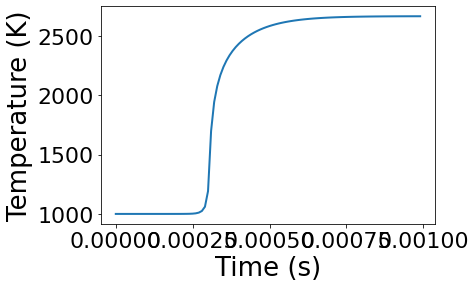

In [67]:
plt.plot(time, temperature)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
#plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

Text(0, 0.5, 'Temperature (K)')

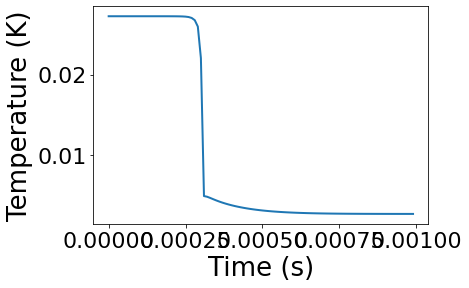

In [68]:
plt.plot(time, Y[:, gas.species_index('H2')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
#plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

Text(0, 0.5, 'Temperature (K)')

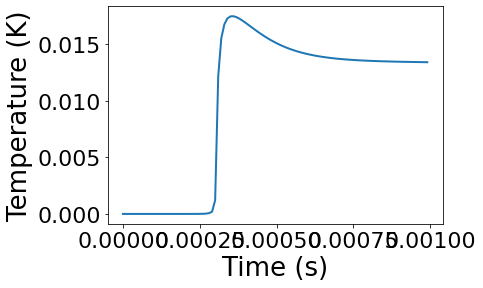

In [69]:
plt.plot(time, Y[:, gas.species_index('OH')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
#plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

In [70]:
temperature[-1]

2663.777432533662

In [74]:
Y[-1, gas.species_index('H2')]

0.002731771351942202

In [71]:
EndSpecies = [gas.species_names[i] for i in range(gas.n_species) if (Y[900,i]*100 > .01)]

IndexError: index 900 is out of bounds for axis 0 with size 100

In [ ]:
EndSpecies

In [90]:
Data    = []

Data.append(np.array([[0.7135284280936453, 1.1046153846153843],
        [0.670018750350959, 1000]]))

Data.append(np.array([[0.7136343366778147, 1.1062653288740245],
        [0.3554059037181068, 513.0325584896998]]))
        
Data.append(np.array([[0.7137402452619842, 1.1078985507246375],
        [0.18852212170408722, 290.9163405623883]]))

Data.append(np.array([[0.7153400222965441, 1.1018283166109253],
         [0.13059965479060548, 176.35054720471388]]))

Data.append(np.array([[0.7153901895206244, 1.1095373467112597],
          [0.09671798642975463, 159.55064004448292]]))

In [91]:
a = []
b = []
for i, DataP in enumerate(Data):
    a.append( (DataP[1,1] - DataP[1,0])/(DataP[0,1] - DataP[0,0]) )
    b.append( DataP[1,0] - a[i]*DataP[0,0] )

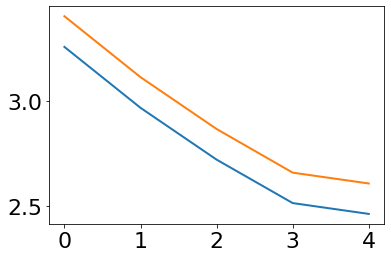

In [101]:
plt.plot(np.log10(np.abs(b)))
plt.plot(np.log10(a))

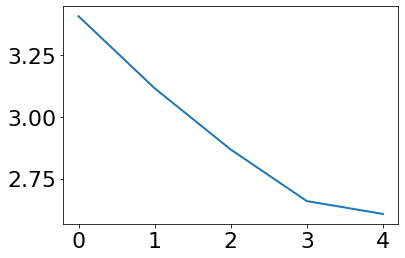

In [100]:
plt.plot(np.log10(a))